In [1]:
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
def coord_func(x,S,g,F):
    r = np.random.random(F)
    return x + 2*(r-0.5)/S**g

def fractal_point_gen(integer,G,D,E=2,S=None,F=None,N_points=None):
    if integer == 'S':
        F=S**D
        F_st = int(F+0.5)
        F_lo = int(F)
        F_hi = F_lo+1
        F_change = F - F_lo
        randoms = np.random.random(G-1)
        F_array = np.concatenate((np.array([F_st]),np.where(randoms>F_change,F_lo,F_hi)),axis=None)
        G_array = np.array([*range(1,G+1)])
    points = []
    for e in range(E):
        x = [0.5]
        for g,f in np.array([G_array,F_array]).T:
            x = [x_ii for x_i in x for x_ii in coord_func(x_i,S,g,f)]
        points.append(x)
    if N_points:
        while len(points[0])>N_points:
            n=1+int(np.random.random()*(len(points[0])-1))
            del points[0][n-1]
            del points[1][n-1]
    return points

def fractal_field_gen(integer,G,D,E,S=None,F=None,N_pix=None,seed=None):
    if seed != None:
        np.random.seed(int(seed))  
    if N_pix==None:
        N_pix = S**G
    fractal_points = fractal_point_gen(integer,G,D,E,S,F)
    fractal_field = np.histogramdd(fractal_points, bins=int(N_pix))[0]
    return fractal_field

In [19]:
def two_pt_corr(coords,separations,s):
    N_s = np.sum(np.where(separations<s,1,0))
    I=len(coords)
    P_s = 2*N_s/(I*(I-1))
    return P_s

# Integer S

In [25]:
S=3
D = 2.3
G=4
E=2

points = fractal_point_gen('S',G,D,E,S)
len(points[0])

26364

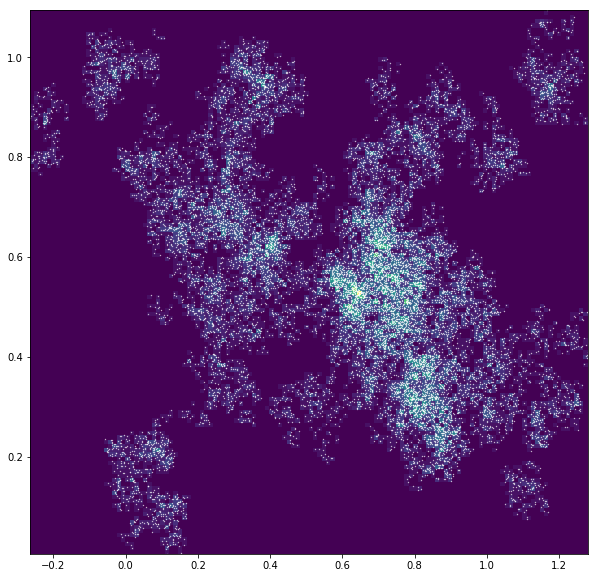

In [23]:
plt.figure(figsize=(10,10))
plt.hist2d(*points, bins=128)
plt.scatter(*points, s=.1, c='w')
plt.show()

In [12]:
coords = [(point[0], point[1]) for point in np.array(points).T]
distance_matrix = distance.cdist(coords, coords, 'euclidean')
separations = np.unique(distance_matrix[distance_matrix != 0])
separations

array([6.78975944e-05, 7.33324076e-05, 1.05861313e-04, ...,
       1.72649775e+00, 1.73351900e+00, 1.73398147e+00])

In [13]:
s_factors = np.linspace(0,2,1000)
P_s_list = [two_pt_corr(points,separations,s) for s in tqdm(s_factors)]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:22<00:00,  1.99it/s]


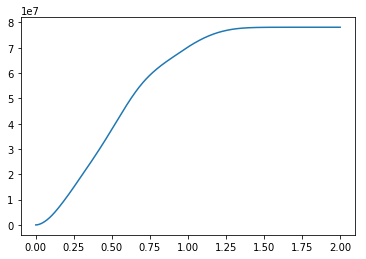

In [14]:
plt.figure()
plt.plot(s_factors,P_s_list)